In [1]:
from manim import *

Manim Community v0.18.0

## NetworkX Teil

In [2]:
import networkx as nx
import matplotlib.pyplot as plt


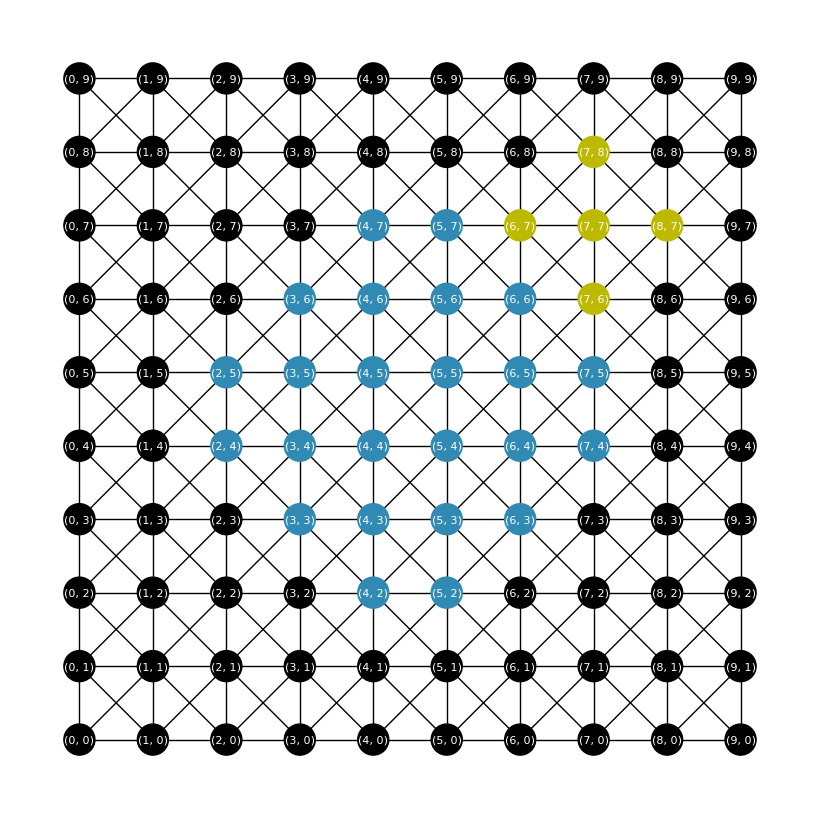

In [3]:
# Create a new graph
G = nx.Graph()

# Add nodes and edges for a 10x10 grid, including diagonal connections
y = 10
x = 10
for i in range(x):
    for j in range(y):
        # Add node
        G.add_node((i, j))

        # Add edges to neighboring nodes (including diagonals)
        if i > 0:
            G.add_edge((i, j), (i - 1, j))  # Edge to the left
            if j > 0:
                G.add_edge((i, j), (i - 1, j - 1))  # Diagonal left-top
            if j < 9:
                G.add_edge((i, j), (i - 1, j + 1))  # Diagonal left-bottom
        if j > 0:
            G.add_edge((i, j), (i, j - 1))  # Edge to the top
        if i < 9:
            G.add_edge((i, j), (i + 1, j))  # Edge to the right
            if j > 0:
                G.add_edge((i, j), (i + 1, j - 1))  # Diagonal right-top
            if j < 9:
                G.add_edge((i, j), (i + 1, j + 1))  # Diagonal right-bottom
        if j < 9:
            G.add_edge((i, j), (i, j + 1))  # Edge to the bottom

# Define positions for the nodes in the graph
pos = {(i, j): (i, j) for i in range(10) for j in range(10)}

# Define nodes for Moon and Earth
moon_nodes = [(7,8), (6,7), (7,7), (8,7), (7,6)]
earth_nodes = [(5,7), (4,7), (3,6), (4,6), (5,6), (6,6), (2,5), (3,5), (4,5), (5,5), (6,5), (7,5), 
               (2,4), (3,4), (4,4), (5,4), (6,4), (7,4), (3,3), (4,3), (5,3), (6,3), (4,2), (5,2)]

# Set colors for each node
node_colors = []
for node in G.nodes():
    if node in moon_nodes:
        node_colors.append('#bdb900')  # Color for Moon
    elif node in earth_nodes:
        node_colors.append('#318ab3')  # Color for Earth
    else:
        node_colors.append('black')  # Default color

# Plot the graph with diagonal connections
plt.figure(figsize=(8, 8))
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color='black', font_color='white', node_size=500, font_size=8)
plt.gca().set_facecolor('grey')
plt.show()


In [4]:
config.media_embed = True
config.tex_compiler = "pdflatex"
# Setzen des weißen Hintergrunds
config.background_color = WHITE

## Manim


In [5]:
%load_ext manim

The manim module is not an IPython extension.


#### Graph

In [6]:
class GraphScene(Scene):
    def construct(self):
        # Konvertiere die 2D-Koordinaten in 3D-Koordinaten für Manim
        pos_3d = {node: (x, y, 0) for node, (x, y) in pos.items()}

        # Definiere die Farben für jeden Knoten
        node_colors = {node: ('#bdb900' if node in moon_nodes else 
                              '#318ab3' if node in earth_nodes else 
                              'black') for node in G.nodes()}

        # Konfiguration für die Knoten
        vertex_config = {
            node: {"radius": 0.2, "stroke_color": BLACK, "stroke_width": 2, "color": node_colors[node]}
            for node in G.nodes()
        }
        
        # Konfiguration für die Kanten
        edge_config = {
            edge: {"stroke_color": BLACK}
            for edge in G.edges()
        }
        # Erstelle einen Manim-Graphen aus dem networkx-Graphen
        m_graph = Graph(list(G.nodes), list(G.edges), layout=pos_3d, layout_scale=1, labels=False, 
                        vertex_config=vertex_config, edge_config=edge_config)

        for edge in m_graph.edges:
            m_graph.edges[edge].set_color(BLACK)

        # Zentriere den Graphen in der Szene
        m_graph.move_to(ORIGIN)

        # Füge den Graphen zur Szene hinzu
        self.add(m_graph)
        #self.play(Create(m_graph))
        self.wait(2)

In [7]:
%manim -pql GraphScene



[01/03/24 14:31:17] INFO     Animation 0 : Partial movie file written in                   ]8;id=831700;file://c:\Users\a829727\AppData\Local\anaconda3\envs\semester_5\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=273841;file://c:\Users\a829727\AppData\Local\anaconda3\envs\semester_5\lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\a829727\OneDrive - Atos\Dokumente\Uni\Semester                              
                             5\Integrationsseminar\media\videos\Integrationsseminar\480p15                         
                             \partial_movie_files\GraphScene\931832650_66111383_4188771860                         
                             .mp4'                                                                                 

                    INFO     Combining to Movie file.                                      ]8;id=166332;file://c:\Users\a829727\AppData\Local\anaconda3\envs\semester_5\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=191326;file://c:\Users\a829727\AppData\Local\anaconda3\envs\semester_5\lib\site-packages\manim\scene\scene_file_writer.py#617\617]8;;\

                    INFO                                                                   ]8;id=390211;file://c:\Users\a829727\AppData\Local\anaconda3\envs\semester_5\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=574218;file://c:\Users\a829727\AppData\Local\anaconda3\envs\semester_5\lib\site-packages\manim\scene\scene_file_writer.py#735\735]8;;\
                             File ready at 'C:\Users\a829727\OneDrive -                                            
                             Atos\Dokumente\Uni\Semester                                                           
                             5\Integrationsseminar\media\videos\Integrationsseminar\480p15                         
                             \GraphScene.mp4'                                                                      
                                                                                                                   

                    INFO     Rendered GraphScene                                                       ]8;id=854608;file://c:\Users\a829727\AppData\Local\anaconda3\envs\semester_5\lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=151680;file://c:\Users\a829727\AppData\Local\anaconda3\envs\semester_5\lib\site-packages\manim\scene\scene.py#241\241]8;;\
                             Played 1 animations                                                                   

OSError: [WinError -2146959355] Starten des Servers fehlgeschlagen: 'C:\\Users\\a829727\\OneDrive - Atos\\Dokumente\\Uni\\Semester 5\\Integrationsseminar\\media\\videos\\Integrationsseminar\\480p15\\GraphScene.mp4'

#### Bild

In [ ]:
class ImageScene(Scene):
    def construct(self):
        # Lade das Bild
        image = ImageMobject("./Bilder/Alles.png")

        # Zentriere das Bild in der Szene
        image.move_to(ORIGIN)
        image.scale(1.2)
        # Füge das Bild zur Szene hinzu und spiele die Animation
        self.add(image)
        self.play(FadeIn(image))
        self.wait(2)
        self.play(FadeOut(image))

In [ ]:
%manim -pql ImageScene

#### Werte Graph

In [ ]:
class TextScene(Scene):
    def construct(self):
        # Erstelle den Text
        text = Text("Welche Werte bekommen die Knoten und Kanten?", color=BLACK)

         # Skaliere den Text, um ihn kleiner zu machen
        text.scale(0.5)
        
        # Zentriere den Text in der Szene und spiele die Animation
        self.play(Write(text))
        self.wait(2)

        # Bewege den Text nach oben als Überschrift
        self.play(text.animate.to_edge(UP))
        self.wait(2)

In [ ]:
%manim -pql TextScene

In [ ]:
class ColoredDotsScene(Scene):
    def construct(self):
        # Erstelle drei Punkte
        dot1 = Dot(color='#bdb900').shift(UP)
        dot2 = Dot(color='#318ab3')
        dot3 = Dot(color=BLACK).shift(DOWN)

        # Erstelle Beschriftungen für jeden Punkt
        label1 = Text("(255, 255, 0)", color=BLACK).next_to(dot1, RIGHT)
        label2 = Text("(173, 216, 230)", color=BLACK).next_to(dot2, RIGHT)
        label3 = Text("(0, 0, 0)", color=BLACK).next_to(dot3, RIGHT)

        # Füge Punkte und Beschriftungen zur Szene hinzu und spiele die Animation
        self.add(dot1, dot2, dot3, label1, label2, label3)
        self.play(FadeIn(dot1), FadeIn(dot2), FadeIn(dot3), Write(label1), Write(label2), Write(label3))
        self.wait(2)


In [ ]:
%manim -pql ColoredDotsScene

## Combined

In [ ]:
class CombinedScene(Scene):
    def construct(self):
        # Erster Teil: Bildszene
        image = ImageMobject("./Bilder/Alles.png")
        image.move_to(ORIGIN)
        image.scale(1.2)
        self.add(image)
        self.play(FadeIn(image))
        self.wait(2)

        # Vorbereitung für den Graphen (versteckt)
        # Konvertiere die 2D-Koordinaten in 3D-Koordinaten für Manim
        pos_3d = {node: (x, y, 0) for node, (x, y) in pos.items()}

        # Definiere die Farben für jeden Knoten
        node_colors = {node: ('#bdb900' if node in moon_nodes else 
                              '#318ab3' if node in earth_nodes else 
                              'black') for node in G.nodes()}

        # Konfiguration für die Knoten
        vertex_config = {
            node: {"radius": 0.2, "stroke_color": BLACK, "stroke_width": 2, "color": node_colors[node]}
            for node in G.nodes()
        }
        
        # Konfiguration für die Kanten
        edge_config = {
            edge: {"stroke_color": BLACK}
            for edge in G.edges()
        }

        # Erstelle einen Manim-Graphen aus dem networkx-Graphen
        m_graph = Graph(list(G.nodes), list(G.edges), layout=pos_3d, layout_scale=1, labels=False, 
                        vertex_config=vertex_config, edge_config=edge_config)
        m_graph.move_to(ORIGIN)
        m_graph.scale(0.01)  # Starte klein für den Zoom-Effekt
        self.add(m_graph)

        # Übergang: Blende das Bild aus und zoome gleichzeitig in den Graphen
        self.play(
            FadeOut(image),
            m_graph.animate.scale(100),  # Zoome in den Graphen
            run_time=2
        )

        # Zeige den Graphen
        #self.play(Create(m_graph))
        self.wait(2)


In [ ]:
%manim -pql CombinedScene

In [ ]:


class FunctionGraphScene(Scene):
    def construct(self):
        # Erstelle den Text "Funktion"
        function_label = Text("Funktion", color=BLACK).to_edge(LEFT)

        # Erstelle das Koordinatensystem
        axes = Axes(
            x_range=[-10, 10, 1], y_range=[-2, 2, 0.5],
            x_length=5, y_length=4,
            axis_config={"color": BLACK},
        ).to_edge(RIGHT)

        # Definiere die Funktion
        function = axes.plot(lambda x: np.exp(-0.125 * x), color=BLACK)

        # Füge Text und Funktion zur Szene hinzu und spiele die Animation
        self.add(function_label, axes, function)
        self.play(Write(function_label), Create(axes), Create(function))
        self.wait(2)

%manim -pql FunctionGraphScene

In [ ]:
class ExponentialGraph(Scene):
    def construct(self):
        # Create axes
        axes = Axes(
            x_range=[0, 400, 50],
            y_range=[0, 1, 0.1],
            x_length=10,
            y_length=6,
            axis_config={"color": BLUE},
        )

        # Create the graph
        graph = axes.plot(lambda x: np.exp(-x/8), color=WHITE)

        # Remove numbers from axes
        axes.x_axis.numbers_to_exclude = set(range(0, 401, 50))
        axes.y_axis.numbers_to_exclude = set(np.arange(0, 1.1, 0.1))

        # Add axes and graph to the scene
        self.add(axes, graph)
        self.play(Create(axes), Create(graph))
        self.wait(2)
    
%manim -pql ExponentialGraph